# Text Classification

### Modelo para categorizar noticias em 9 diferentes categorias (esportes, negócios, etc..). Foram usados dois tipos de modelos diferentes e ambos tiveram o mesmo desempenho

## Importando Pacotes

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lendo Dados

In [5]:
df_raw = pd.read_csv('news_articles.csv')

In [6]:
df_raw.head()

,url,category,body
0,https://www.bbc.co.uk/news/business-52892398,business,easyjet and cruise firm carnival are to lose t...
1,https://www.bbc.co.uk/news/business-52897418,business,british airways is in a bitter standoff with u...
2,https://www.bbc.co.uk/news/business-52896266,business,us trade representative robert lighthizer the...
3,https://www.bbc.co.uk/news/uk-england-beds-buc...,business,google adelie foods was hit by a drop in the ...
4,https://www.bbc.co.uk/news/business-52883453,business,"matthew horwood some 300,000 more uk workers ..."


## Dropando coluna "url"

In [9]:
df_raw = df_raw.drop(columns='url')

In [10]:
df_raw.head()

,category,body
0,business,easyjet and cruise firm carnival are to lose t...
1,business,british airways is in a bitter standoff with u...
2,business,us trade representative robert lighthizer the...
3,business,google adelie foods was hit by a drop in the ...
4,business,"matthew horwood some 300,000 more uk workers ..."


## Criando coluna "category_id" para representar a categoria da noticia

In [12]:
df_raw['category_id'] = df_raw['category'].factorize()[0]

In [15]:
df_raw

,category,body,category_id
0,business,easyjet and cruise firm carnival are to lose t...,0
1,business,british airways is in a bitter standoff with u...,0
2,business,us trade representative robert lighthizer the...,0
3,business,google adelie foods was hit by a drop in the ...,0
4,business,"matthew horwood some 300,000 more uk workers ...",0
...,...,...,...
1671,food_and_drink,aldi is offering wine-lovers the chance to sam...,9
1672,food_and_drink,morrisons and deliveroo have joined up to offe...,9
1673,food_and_drink,a “doomsday” management exercise helped tesco ...,9
1674,food_and_drink,a restaurant in texas was left dumbstruck on f...,9


## Analise quantitativa de noticias x categoria

In [18]:
fig = plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

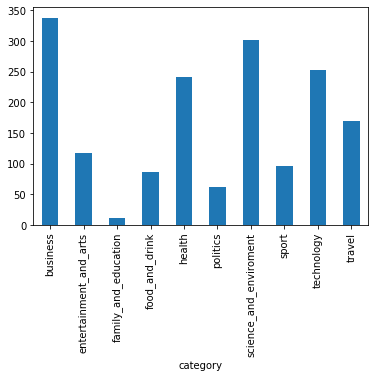

In [22]:
df_raw.groupby('category').body.count().plot.bar(ylim=0)

## Transformando a coluna "body" usando CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [26]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

In [28]:
X = vectorizer.fit_transform(df_raw['body']).toarray()

In [31]:
y = df_raw['category_id']

In [32]:
print(X)

[[0 0 5 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 1]
 [1 2 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [33]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1671    9
1672    9
1673    9
1674    9
1675    9
Name: category_id, Length: 1676, dtype: int64


## Separando dados entre treino e teste

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Usando modelo RandomForestClassifier 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
classifier = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)

In [57]:
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [58]:
y_pred = classifier.predict(X_test)

## Avaliando desempenho do modelo RandomForestClassifier

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
print(confusion_matrix(y_test,y_pred))

[[69  0  0  0  1  0  0  0  0  0]
 [ 2  3  4  1  0  0  0  0  0  0]
 [ 1  2 44  0  1  0  0  2  0  0]
 [ 1  1  1  0  0  0  0  0  0  0]
 [ 6  0  4  0 32 10  0  1  0  0]
 [ 5  0  0  0 14 34  5  0  0  0]
 [ 3  0  0  0  2  1 22  2  0  0]
 [ 1  0  1  0  0  2  0  8  0  0]
 [ 4  0  0  0  1  0  1  0 27  0]
 [ 0  0  2  0  0  3  0  0  0 12]]


In [61]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.99      0.85        70
           1       0.50      0.30      0.37        10
           2       0.79      0.88      0.83        50
           3       0.00      0.00      0.00         3
           4       0.63      0.60      0.62        53
           5       0.68      0.59      0.63        58
           6       0.79      0.73      0.76        30
           7       0.62      0.67      0.64        12
           8       1.00      0.82      0.90        33
           9       1.00      0.71      0.83        17

    accuracy                           0.75       336
   macro avg       0.67      0.63      0.64       336
weighted avg       0.75      0.75      0.74       336



In [62]:
print(accuracy_score(y_test, y_pred))

0.7470238095238095


## Criando dataframe com de x para de categorias x category_id

In [47]:
df_category = df_raw.drop_duplicates(subset=['category_id','category'])

In [48]:
df_category

,category,body,category_id
0,business,easyjet and cruise firm carnival are to lose t...,0
338,politics,uk parliament/ jessica taylor the queue to vo...,1
400,health,a large proportion of nhs doctors are from an ...,2
642,family_and_education,"drug gangs have been on a ""recruitment drive"" ...",3
653,science_and_enviroment,tree loss in bolivia increased hugely in 2019 ...,4
955,technology,"mark zuckerberg is setting a ""dangerous preced...",5
1207,entertainment_and_arts,media playback is unsupported on your device m...,6
1325,sport,widespread protests have taken place across 75...,7
1421,travel,advertisement instagram doesn't just do the h...,8
1590,food_and_drink,"the mixologist’s favourite, a good vodka is th...",9


## Usando modelo MultinomialNB

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clfrNB = MultinomialNB(alpha = 0.1)

In [66]:
clfrNB.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [68]:
preds = clfrNB.predict(X_test)

## Avaliando desempenho

In [73]:
accuracy_score(y_test, y_pred)

0.7470238095238095